# Importing Libraries

In [1]:
# Importing Libraries

# Importing pandas and numpy library for data manipulation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Importing r2_score module to calculate r square value
from sklearn.metrics import r2_score

# Importing Regression libraries from sklearn
from sklearn.linear_model import ARDRegression, Ridge, Lasso, ElasticNet , HuberRegressor
from sklearn.linear_model import Lars, PassiveAggressiveRegressor, RANSACRegressor, SGDRegressor, TweedieRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge, LinearRegression

# Importing Boosting Regression algorithm
# If below library is not installed on your system then you can install using following syntax - !pip install lightgbm
from lightgbm import LGBMRegressor

# If below library is not installed on your system then you can install using following syntax - !pip install xgboost
from xgboost import XGBRegressor

# If below library is not installed on your system then you can install using following syntax - !pip install catboost
from catboost import CatBoostRegressor

# Importing library to save trained model
import pickle
import joblib

# Suppressing all warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler


# Loading Train and Test dataset

In [2]:
# Reading Train & Test dataset (Taking CSV data in dataframe)
df_withTarget = pd.read_csv('train.csv')
df_withoutTarget = pd.read_csv('test.csv')

In [3]:
#Backup
df_withTarget_copy = df_withTarget.copy()
df_withoutTarget_copy = df_withoutTarget.copy()

In [4]:
df_withTarget_copy.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


# Creating average of engagement score by grouping user_id, category_id, video_id separately

In [5]:
df_user_id_eng_score = pd.DataFrame()
df_user_id_eng_score['uid_engagement_score_mean'] = df_withTarget_copy.groupby('user_id').mean()['engagement_score']
df_withTarget_copy = pd.merge(df_withTarget_copy, df_user_id_eng_score,  on='user_id', how= 'left')
df_withoutTarget_copy = pd.merge(df_withoutTarget_copy, df_user_id_eng_score,  on='user_id', how= 'left')

#df_user_id_eng_score['user_id'] = df_withTarget_copy.groupby('user_id').mean().index

In [6]:
df_category_id_eng_score = pd.DataFrame()
df_category_id_eng_score['cid_engagement_score_mean'] = df_withTarget_copy.groupby('category_id').mean()['engagement_score']
df_withTarget_copy = pd.merge(df_withTarget_copy, df_category_id_eng_score,  on='category_id', how= 'left')
df_withoutTarget_copy = pd.merge(df_withoutTarget_copy, df_category_id_eng_score,  on='category_id', how= 'left')

#df_user_id_eng_score['user_id'] = df_withTarget_copy.groupby('user_id').mean().index

In [7]:
df_video_id_eng_score = pd.DataFrame()
df_video_id_eng_score['vid_engagement_score_mean'] = df_withTarget_copy.groupby('video_id').mean()['engagement_score']
df_withTarget_copy = pd.merge(df_withTarget_copy, df_video_id_eng_score,  on='video_id', how= 'left')
df_withoutTarget_copy = pd.merge(df_withoutTarget_copy, df_video_id_eng_score,  on='video_id', how= 'left')

#df_user_id_eng_score['user_id'] = df_withTarget_copy.groupby('user_id').mean().index

In [8]:
#df_withTarget_copy

# Feature engineering - creating more variables from existing variable

In [9]:
df_withTarget_copy['age_cat'] = df_withTarget_copy['age']
df_withTarget_copy['age_cat'] = ['child' if i<18 else j for i,j in zip(df_withTarget_copy['age'], df_withTarget_copy['age_cat'])]
df_withTarget_copy['age_cat'] = ['old' if i>45 else j for i,j in zip(df_withTarget_copy['age'], df_withTarget_copy['age_cat'])]
df_withTarget_copy['age_cat'] = ['young' if (i>=18 and i <= 45) else j for i,j in zip(df_withTarget_copy['age'], df_withTarget_copy['age_cat'])]

In [10]:
#df_withTarget_copy['age_gender'] = [i+'_'+ j for i,j in zip(df_withTarget_copy['age_cat'], df_withTarget_copy['gender'])]
#df_withTarget_copy['age_profession'] = [i+'_'+ j for i,j in zip(df_withTarget_copy['age_cat'], df_withTarget_copy['profession'])]
#df_withTarget_copy['gender_profession'] = [i+'_'+ j for i,j in zip(df_withTarget_copy['gender'], df_withTarget_copy['profession'])]

In [11]:
df_withoutTarget_copy['age_cat'] = df_withoutTarget_copy['age']
df_withoutTarget_copy['age_cat'] = ['child' if i<18 else j for i,j in zip(df_withoutTarget_copy['age'], df_withoutTarget_copy['age_cat'])]
df_withoutTarget_copy['age_cat'] = ['old' if i>45 else j for i,j in zip(df_withoutTarget_copy['age'], df_withoutTarget_copy['age_cat'])]
df_withoutTarget_copy['age_cat'] = ['young' if (i>=18 and i <= 45) else j for i,j in zip(df_withoutTarget_copy['age'], df_withoutTarget_copy['age_cat'])]

In [12]:
#df_withoutTarget_copy['age_gender'] = [i+'_'+ j for i,j in zip(df_withoutTarget_copy['age_cat'], df_withoutTarget_copy['gender'])]
#df_withoutTarget_copy['age_profession'] = [i+'_'+ j for i,j in zip(df_withoutTarget_copy['age_cat'], df_withoutTarget_copy['profession'])]
#df_withoutTarget_copy['gender_profession'] = [i+'_'+ j for i,j in zip(df_withoutTarget_copy['gender'], df_withoutTarget_copy['profession'])]

In [13]:
df_withTarget_copy.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,uid_engagement_score_mean,cid_engagement_score_mean,vid_engagement_score_mean,age_cat
0,1,19990,37,128,24,Male,Student,180,1000,4.33,4.673333,3.314751,3.325765,young
1,2,5304,32,132,14,Female,Student,330,714,1.79,3.080000,3.442341,3.414046,child
2,3,1840,12,24,19,Male,Student,180,138,4.35,4.193333,3.571666,3.478865,young
3,4,12597,23,112,19,Male,Student,220,613,3.77,3.410000,3.955189,3.877502,young
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13,3.152500,3.955189,3.877502,young


In [14]:
df_withTarget_copy.drop('age_cat', axis=1, inplace= True)
df_withoutTarget_copy.drop('age_cat', axis=1, inplace= True)

In [15]:
df_withTarget_copy['follower_view'] = 'na'
df_withTarget_copy['follower_view'] = ['high_follower_high_view' if (i>260 and j > 500) else k for i,j, k in zip(df_withTarget_copy['followers'], df_withTarget_copy['views'], df_withTarget_copy['follower_view'])]
df_withTarget_copy['follower_view'] = ['high_follower_low_view' if (i>260 and j <= 500) else k for i,j, k in zip(df_withTarget_copy['followers'], df_withTarget_copy['views'], df_withTarget_copy['follower_view'])]
df_withTarget_copy['follower_view'] = ['low_follower_low_view' if (i<=260 and j <= 500) else k for i,j, k in zip(df_withTarget_copy['followers'], df_withTarget_copy['views'], df_withTarget_copy['follower_view'])]
df_withTarget_copy['follower_view'] = ['low_follower_high_view' if (i<=260 and j > 500) else k for i,j, k in zip(df_withTarget_copy['followers'], df_withTarget_copy['views'], df_withTarget_copy['follower_view'])]


In [16]:
#df_withTarget_copy['follower_view'].unique()

In [17]:
df_withoutTarget_copy['follower_view'] = 'na'
df_withoutTarget_copy['follower_view'] = ['high_follower_high_view' if (i>260 and j > 500) else k for i,j, k in zip(df_withoutTarget_copy['followers'], df_withoutTarget_copy['views'], df_withoutTarget_copy['follower_view'])]
df_withoutTarget_copy['follower_view'] = ['high_follower_low_view' if (i>260 and j <= 500) else k for i,j, k in zip(df_withoutTarget_copy['followers'], df_withoutTarget_copy['views'], df_withoutTarget_copy['follower_view'])]
df_withoutTarget_copy['follower_view'] = ['low_follower_low_view' if (i<=260 and j <= 500) else k for i,j, k in zip(df_withoutTarget_copy['followers'], df_withoutTarget_copy['views'], df_withoutTarget_copy['follower_view'])]
df_withoutTarget_copy['follower_view'] = ['low_follower_high_view' if (i<=260 and j > 500) else k for i,j, k in zip(df_withoutTarget_copy['followers'], df_withoutTarget_copy['views'], df_withoutTarget_copy['follower_view'])]


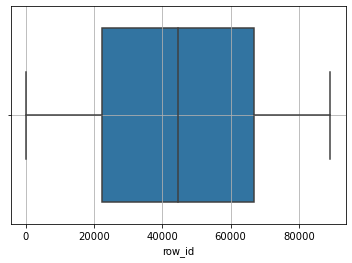

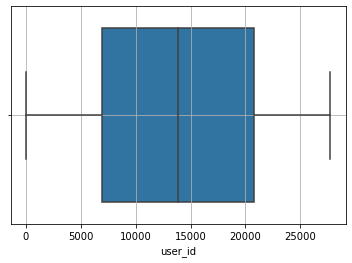

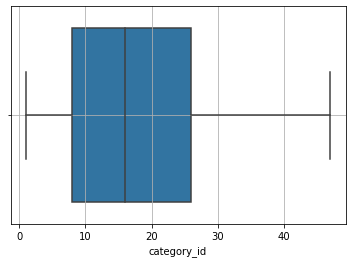

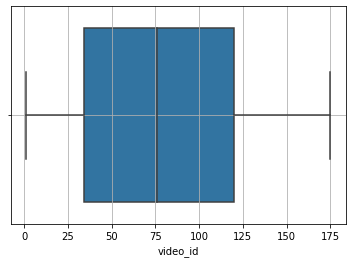

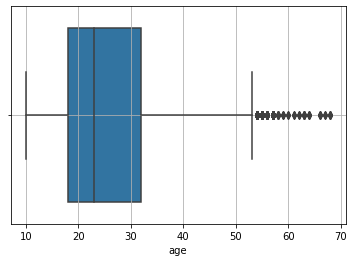

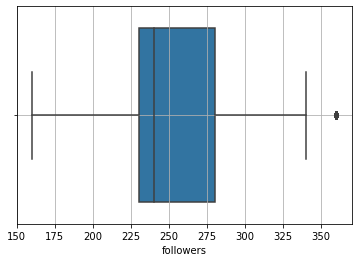

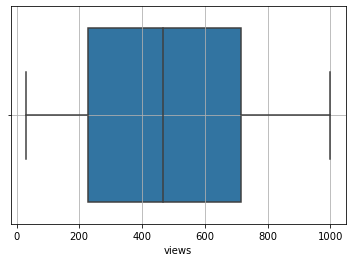

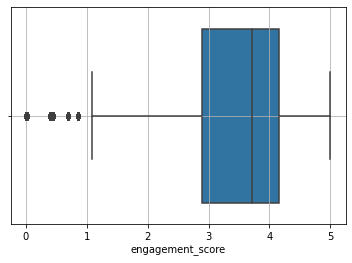

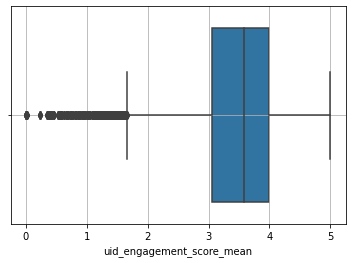

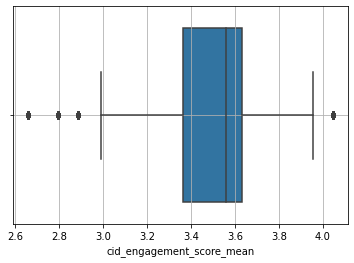

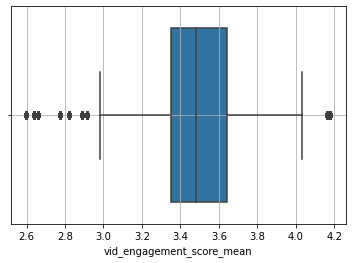

In [18]:
cols = ['Age','Vintage','Avg_Account_Balance']
for i in df_withTarget_copy.columns:
    if(df_withTarget_copy[i].dtype != 'object'):
        sns.boxplot(df_withTarget_copy[i])
        plt.grid()
        plt.show();

<AxesSubplot:>

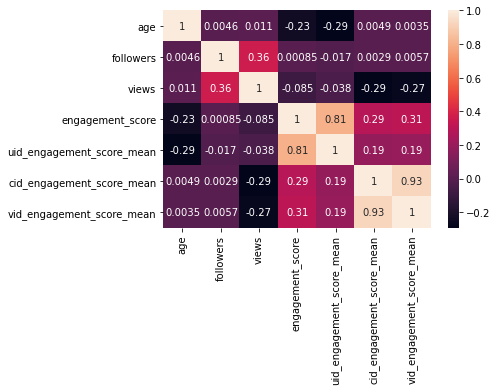

In [19]:
temp_df = df_withTarget_copy.drop(['row_id', 'user_id', 'category_id', 'video_id'], axis=1)
corr = temp_df.corr(method='pearson')
#print(corr)
sns.heatmap(corr,annot=True)

In [20]:
df_withTarget = df_withTarget_copy.copy()
df_withoutTarget = df_withoutTarget_copy.copy()

In [21]:
df_withTarget.drop(['row_id', 'user_id', 'category_id', 'video_id'], axis=1, inplace= True)
df_withoutTarget.drop(['row_id', 'user_id', 'category_id', 'video_id'], axis=1, inplace= True)

In [22]:
df_withTarget.head()

,age,gender,profession,followers,views,engagement_score,uid_engagement_score_mean,cid_engagement_score_mean,vid_engagement_score_mean,follower_view
0,24,Male,Student,180,1000,4.33,4.673333,3.314751,3.325765,low_follower_high_view
1,14,Female,Student,330,714,1.79,3.080000,3.442341,3.414046,high_follower_high_view
2,19,Male,Student,180,138,4.35,4.193333,3.571666,3.478865,low_follower_low_view
3,19,Male,Student,220,613,3.77,3.410000,3.955189,3.877502,low_follower_high_view
4,27,Male,Working Professional,220,613,3.13,3.152500,3.955189,3.877502,low_follower_high_view


# Initiating required variable for ML pipeline

In [23]:
# list of ml algorithm models
algoPool = []

# Dataframe to store model name, model object, r_square value
df_output_cols = ['model_name', 'model_object', 'r_square_value']
df_output = pd.DataFrame(columns = df_output_cols)

# Target column name
targetColumn_df_withTarget = 'engagement_score'

# Function to preprocess raw data

In [24]:
# Function to preprocess dataframe
def dataPreprocess(df_beforePreprocess):
    df_after_conversion = pd.get_dummies(df_beforePreprocess, drop_first=True)
    return df_after_conversion

# ML regression Pipeline

In [25]:
# ML Regression Pipeline
def mlRegPipeline(df_withTarget, targetColumn_df_withTarget, df_withoutTarget):
    
    #separate the other attributes from the predicting attribute
    # Training data without target
    X = df_withTarget.drop(targetColumn_df_withTarget, axis=1)
    # Training data target variable
    y = df_withTarget[targetColumn_df_withTarget]
    
    # To combine tain and test data. we'll preprocess the data together and the we'll separate it.
    X['train'] = 1
    df_withoutTarget['train'] = 0
    
    # Combining train and test data and preprocessing
    combin_train_test = pd.concat([X, df_withoutTarget])    
    combin_train_test = dataPreprocess(combin_train_test)
    
    # Separating train and test data
    X = combin_train_test[combin_train_test['train'] == 1]
    df_withoutTarget_afterProcess = combin_train_test[combin_train_test['train'] == 0]
    
    # Droping the train column from dataframe
    X = X.drop('train', axis = 1)
    df_withoutTarget_afterProcess = df_withoutTarget_afterProcess.drop('train', axis = 1)
    df_withoutTarget = df_withoutTarget.drop('train', axis = 1)
    
    # splitting the training data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Training the Models
    # ARD Regression
    ard_model = ARDRegression()
    #algoPool.append(ard_model)
    
    # Ridge Regression
    ridge_model = Ridge()
    #algoPool.append(ridge_model)
    
    # Lasso Regression
    lasso_model = Lasso()
    #algoPool.append(lasso_model)
    
    # ElasticNet Regression
    elasticNet_model = ElasticNet()
    #algoPool.append(elasticNet_model)
    
    # Huber Regression
    huber_model = HuberRegressor()
    #algoPool.append(huber_model)
    
    # Lars Regression
    lars_model = Lars()
    #algoPool.append(lars_model)

    # PassiveAggressiveRegressor Regression
    passiveAggressiveRegressor_model = PassiveAggressiveRegressor()
    #algoPool.append(passiveAggressiveRegressor_model)

    # RANSACRegressor Regression
    ransac_Regressor_model = RANSACRegressor()
    #algoPool.append(ransac_Regressor_model)

    # SGDRegressor Regression
    sgd_Regressor_model = SGDRegressor()
    #algoPool.append(sgd_Regressor_model)

    # TweedieRegressor Regression
    tweedieRegressor_model = TweedieRegressor()
    #algoPool.append(tweedieRegressor_model)
    
    # BaggingRegressor Regression
    baggingRegressor_model = BaggingRegressor()
    algoPool.append(baggingRegressor_model)

    # RandomForestRegressor Regression
    randomForestRegressor_model = RandomForestRegressor()
    algoPool.append(randomForestRegressor_model)

    # KernelRidge Regression
    kernelRidge_model = KernelRidge()
    #algoPool.append(kernelRidge_model)

    # BayesianRidge Regression
    bayesianRidge_model = BayesianRidge()
    #algoPool.append(bayesianRidge_model)

    # SVR Regression
    svr_model = SVR()
    #algoPool.append(svr_model)
    
    # XGBRegressor Regression
    xgb_regressor_model = XGBRegressor()
    algoPool.append(xgb_regressor_model)
    
    # LGBMRegressor Regression
    lightgbm_model = LGBMRegressor()
    algoPool.append(lightgbm_model)
    
    # CatBoostRegressor Regression
    catboost_model = CatBoostRegressor()
    algoPool.append(catboost_model)
    
    # Linear Regression
    linear_model = LinearRegression()
    algoPool.append(linear_model)
    
    # Training each model using X_train and y_train
    algoPool_trained_model = [model.fit(X_train, y_train) for model in algoPool ]
    
    # Storing Model name in dataframe
    df_output['model_name'] = [type(model).__name__ for model in algoPool_trained_model]
    # Storing Model object in dataframe
    df_output['model_object'] = algoPool_trained_model
    # Storing r square value of Model in dataframe
    df_output['r_square_value'] = [r2_score(y_test, model.predict(X_test)) for model in algoPool_trained_model]
    
    # Sorting output dataframe by r_square value - 1st Output
    df_output.sort_values(by=['r_square_value'], ascending= False, inplace = True, ignore_index = True)

    
    
    # Save the model as a pickle in a file - 2nd output
    joblib.dump(df_output.loc[0, 'model_object'], 'best_regression_model.pkl')

    # Load the model from the file
    best_model_from_joblib = joblib.load('best_regression_model.pkl')

    # Use the loaded model to make predictions
    df_withoutTarget[targetColumn_df_withTarget] = best_model_from_joblib.predict(df_withoutTarget_afterProcess)
    
    # To save output file in csv - 3rd output
    df_withoutTarget.to_csv('output_test_data.csv', index=False)
    
    return df_output

In [26]:
# Calling mlRegPipeline() to find best regression model
mlRegPipeline(df_withTarget, targetColumn_df_withTarget, df_withoutTarget)

Learning rate set to 0.083428
0:	learn: 0.8194128	total: 178ms	remaining: 2m 57s
1:	learn: 0.7806117	total: 206ms	remaining: 1m 43s
2:	learn: 0.7452672	total: 238ms	remaining: 1m 19s
3:	learn: 0.7136506	total: 261ms	remaining: 1m 5s
4:	learn: 0.6875877	total: 280ms	remaining: 55.6s
5:	learn: 0.6628967	total: 294ms	remaining: 48.8s
6:	learn: 0.6415677	total: 309ms	remaining: 43.9s
7:	learn: 0.6221260	total: 324ms	remaining: 40.1s
8:	learn: 0.6051717	total: 338ms	remaining: 37.2s
9:	learn: 0.5900492	total: 352ms	remaining: 34.9s
10:	learn: 0.5767994	total: 367ms	remaining: 33s
11:	learn: 0.5653522	total: 385ms	remaining: 31.7s
12:	learn: 0.5553816	total: 399ms	remaining: 30.3s
13:	learn: 0.5464969	total: 413ms	remaining: 29.1s
14:	learn: 0.5391535	total: 428ms	remaining: 28.1s
15:	learn: 0.5325997	total: 444ms	remaining: 27.3s
16:	learn: 0.5269572	total: 461ms	remaining: 26.6s
17:	learn: 0.5215933	total: 479ms	remaining: 26.1s
18:	learn: 0.5170494	total: 497ms	remaining: 25.7s
19:	learn:

164:	learn: 0.4723151	total: 2.93s	remaining: 14.8s
165:	learn: 0.4722860	total: 2.95s	remaining: 14.8s
166:	learn: 0.4722249	total: 2.96s	remaining: 14.8s
167:	learn: 0.4721696	total: 2.97s	remaining: 14.7s
168:	learn: 0.4721295	total: 2.99s	remaining: 14.7s
169:	learn: 0.4720877	total: 3s	remaining: 14.6s
170:	learn: 0.4720642	total: 3.01s	remaining: 14.6s
171:	learn: 0.4720376	total: 3.03s	remaining: 14.6s
172:	learn: 0.4719905	total: 3.04s	remaining: 14.5s
173:	learn: 0.4719539	total: 3.06s	remaining: 14.5s
174:	learn: 0.4719144	total: 3.07s	remaining: 14.5s
175:	learn: 0.4718791	total: 3.08s	remaining: 14.4s
176:	learn: 0.4718508	total: 3.1s	remaining: 14.4s
177:	learn: 0.4717977	total: 3.12s	remaining: 14.4s
178:	learn: 0.4717453	total: 3.13s	remaining: 14.4s
179:	learn: 0.4716751	total: 3.15s	remaining: 14.3s
180:	learn: 0.4716402	total: 3.16s	remaining: 14.3s
181:	learn: 0.4715976	total: 3.17s	remaining: 14.3s
182:	learn: 0.4715603	total: 3.19s	remaining: 14.2s
183:	learn: 0.47

325:	learn: 0.4665017	total: 5.3s	remaining: 11s
326:	learn: 0.4664785	total: 5.31s	remaining: 10.9s
327:	learn: 0.4664636	total: 5.33s	remaining: 10.9s
328:	learn: 0.4664385	total: 5.34s	remaining: 10.9s
329:	learn: 0.4664007	total: 5.35s	remaining: 10.9s
330:	learn: 0.4663680	total: 5.37s	remaining: 10.8s
331:	learn: 0.4663078	total: 5.38s	remaining: 10.8s
332:	learn: 0.4662824	total: 5.4s	remaining: 10.8s
333:	learn: 0.4662464	total: 5.41s	remaining: 10.8s
334:	learn: 0.4661969	total: 5.42s	remaining: 10.8s
335:	learn: 0.4661828	total: 5.43s	remaining: 10.7s
336:	learn: 0.4661537	total: 5.45s	remaining: 10.7s
337:	learn: 0.4661252	total: 5.46s	remaining: 10.7s
338:	learn: 0.4661058	total: 5.47s	remaining: 10.7s
339:	learn: 0.4660797	total: 5.49s	remaining: 10.7s
340:	learn: 0.4660493	total: 5.51s	remaining: 10.6s
341:	learn: 0.4660145	total: 5.53s	remaining: 10.6s
342:	learn: 0.4659911	total: 5.54s	remaining: 10.6s
343:	learn: 0.4659583	total: 5.56s	remaining: 10.6s
344:	learn: 0.46

490:	learn: 0.4621580	total: 8.1s	remaining: 8.4s
491:	learn: 0.4621254	total: 8.12s	remaining: 8.38s
492:	learn: 0.4620825	total: 8.13s	remaining: 8.37s
493:	learn: 0.4620618	total: 8.15s	remaining: 8.35s
494:	learn: 0.4620355	total: 8.16s	remaining: 8.33s
495:	learn: 0.4620065	total: 8.18s	remaining: 8.31s
496:	learn: 0.4619862	total: 8.19s	remaining: 8.29s
497:	learn: 0.4619774	total: 8.2s	remaining: 8.27s
498:	learn: 0.4619636	total: 8.22s	remaining: 8.25s
499:	learn: 0.4619502	total: 8.23s	remaining: 8.23s
500:	learn: 0.4619323	total: 8.24s	remaining: 8.21s
501:	learn: 0.4619164	total: 8.26s	remaining: 8.19s
502:	learn: 0.4619000	total: 8.27s	remaining: 8.17s
503:	learn: 0.4618654	total: 8.29s	remaining: 8.15s
504:	learn: 0.4618325	total: 8.3s	remaining: 8.14s
505:	learn: 0.4618137	total: 8.31s	remaining: 8.12s
506:	learn: 0.4617852	total: 8.33s	remaining: 8.1s
507:	learn: 0.4617503	total: 8.34s	remaining: 8.08s
508:	learn: 0.4617202	total: 8.36s	remaining: 8.06s
509:	learn: 0.461

657:	learn: 0.4584296	total: 10.6s	remaining: 5.53s
658:	learn: 0.4584172	total: 10.7s	remaining: 5.51s
659:	learn: 0.4583873	total: 10.7s	remaining: 5.5s
660:	learn: 0.4583743	total: 10.7s	remaining: 5.48s
661:	learn: 0.4583498	total: 10.7s	remaining: 5.46s
662:	learn: 0.4583165	total: 10.7s	remaining: 5.45s
663:	learn: 0.4582957	total: 10.7s	remaining: 5.43s
664:	learn: 0.4582770	total: 10.7s	remaining: 5.41s
665:	learn: 0.4582558	total: 10.8s	remaining: 5.39s
666:	learn: 0.4582440	total: 10.8s	remaining: 5.38s
667:	learn: 0.4582285	total: 10.8s	remaining: 5.36s
668:	learn: 0.4582180	total: 10.8s	remaining: 5.34s
669:	learn: 0.4581981	total: 10.8s	remaining: 5.33s
670:	learn: 0.4581783	total: 10.8s	remaining: 5.31s
671:	learn: 0.4581580	total: 10.9s	remaining: 5.3s
672:	learn: 0.4581490	total: 10.9s	remaining: 5.28s
673:	learn: 0.4581265	total: 10.9s	remaining: 5.27s
674:	learn: 0.4581205	total: 10.9s	remaining: 5.25s
675:	learn: 0.4580947	total: 10.9s	remaining: 5.23s
676:	learn: 0.

820:	learn: 0.4553718	total: 13.4s	remaining: 2.92s
821:	learn: 0.4553534	total: 13.4s	remaining: 2.9s
822:	learn: 0.4553383	total: 13.4s	remaining: 2.89s
823:	learn: 0.4553269	total: 13.4s	remaining: 2.87s
824:	learn: 0.4553236	total: 13.4s	remaining: 2.85s
825:	learn: 0.4553016	total: 13.5s	remaining: 2.84s
826:	learn: 0.4552855	total: 13.5s	remaining: 2.82s
827:	learn: 0.4552596	total: 13.5s	remaining: 2.8s
828:	learn: 0.4552284	total: 13.5s	remaining: 2.79s
829:	learn: 0.4552050	total: 13.5s	remaining: 2.77s
830:	learn: 0.4551840	total: 13.5s	remaining: 2.75s
831:	learn: 0.4551629	total: 13.6s	remaining: 2.74s
832:	learn: 0.4551352	total: 13.6s	remaining: 2.72s
833:	learn: 0.4551047	total: 13.6s	remaining: 2.7s
834:	learn: 0.4550921	total: 13.6s	remaining: 2.69s
835:	learn: 0.4550780	total: 13.6s	remaining: 2.67s
836:	learn: 0.4550514	total: 13.6s	remaining: 2.65s
837:	learn: 0.4550454	total: 13.6s	remaining: 2.63s
838:	learn: 0.4550323	total: 13.6s	remaining: 2.62s
839:	learn: 0.4

979:	learn: 0.4524926	total: 16.1s	remaining: 329ms
980:	learn: 0.4524724	total: 16.1s	remaining: 313ms
981:	learn: 0.4524540	total: 16.2s	remaining: 296ms
982:	learn: 0.4524349	total: 16.2s	remaining: 280ms
983:	learn: 0.4524226	total: 16.2s	remaining: 263ms
984:	learn: 0.4524046	total: 16.2s	remaining: 247ms
985:	learn: 0.4523877	total: 16.2s	remaining: 231ms
986:	learn: 0.4523810	total: 16.3s	remaining: 214ms
987:	learn: 0.4523633	total: 16.3s	remaining: 198ms
988:	learn: 0.4523362	total: 16.3s	remaining: 181ms
989:	learn: 0.4523084	total: 16.3s	remaining: 165ms
990:	learn: 0.4522795	total: 16.3s	remaining: 148ms
991:	learn: 0.4522688	total: 16.3s	remaining: 132ms
992:	learn: 0.4522510	total: 16.4s	remaining: 115ms
993:	learn: 0.4522420	total: 16.4s	remaining: 98.8ms
994:	learn: 0.4522234	total: 16.4s	remaining: 82.3ms
995:	learn: 0.4521956	total: 16.4s	remaining: 65.9ms
996:	learn: 0.4521793	total: 16.4s	remaining: 49.4ms
997:	learn: 0.4521644	total: 16.5s	remaining: 33ms
998:	lear

,model_name,model_object,r_square_value
0,LGBMRegressor,LGBMRegressor(),0.691017
1,CatBoostRegressor,<catboost.core.CatBoostRegressor object at 0x0...,0.691010
2,XGBRegressor,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.681633
3,LinearRegression,LinearRegression(),0.672768
4,RandomForestRegressor,"(DecisionTreeRegressor(max_features='auto', ra...",0.646907
5,BaggingRegressor,(DecisionTreeRegressor(random_state=763259295)...,0.617284
